In [23]:
import pandas as pd
Interflow_DS = pd.read_csv("../data/Interflow_Production_Data.csv")
Interflow_DS

,Date,Junctions Cut,NORTHERN,CENTRAL,NEW ZEALAND,SOUTH AUSTRALIA,SOUTHERN,WESTERN
0,1/07/2009,13.000000,7,1.000000,0,0,5,0
1,2/07/2009,22.000000,9,8.000000,0,0,5,0
2,3/07/2009,35.000000,11,1.000000,15,0,8,0
3,4/07/2009,16.000000,6,4.000000,0,0,6,0
4,5/07/2009,0.000000,0,0.000000,0,0,0,0
5,6/07/2009,51.000000,27,3.000000,2,0,19,0
6,7/07/2009,27.000000,22,4.000000,0,0,1,0
7,8/07/2009,41.000000,21,8.000000,0,0,12,0
8,9/07/2009,17.000000,8,4.000000,0,0,5,0
9,10/07/2009,19.000000,2,13.000000,0,0,4,0


In [2]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt

seaborn.pairplot(Interflow_DS.iloc[::5], plot_kws={'alpha': 0.5})

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
X = Interflow_DS[['SOUTHERN']]
Y = Interflow_DS['Junctions Cut']
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

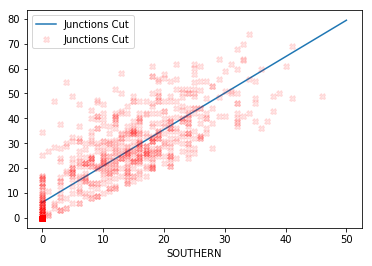

In [4]:
import numpy as np
xfit = np.linspace(0, 50)
xfit_reshaped = xfit[:, np.newaxis]
yfit = model.predict(xfit_reshaped)

Predicted_df = pd.DataFrame({'SOUTHERN':xfit, 'Junctions Cut':yfit})
ax = Predicted_df.plot('SOUTHERN','Junctions Cut')
Interflow_DS.plot('SOUTHERN','Junctions Cut',marker='X', linewidth = 0, ax=ax, c = 'red', alpha=0.1)

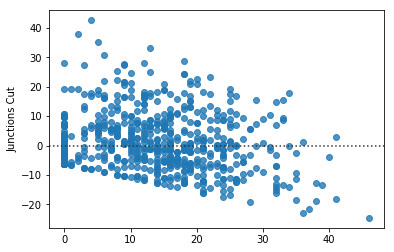

In [5]:
X_SOUTHERN = Interflow_DS[['SOUTHERN']]
Y_Junctions = Interflow_DS['Junctions Cut']

seaborn.residplot(X_SOUTHERN,Y_Junctions)

The regression above is not constant. I will try a log transform to rectify

Will use log(X + 1) to avoid minus infinities

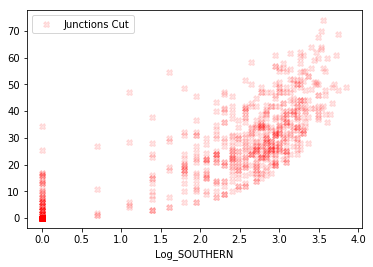

In [42]:
import math
Interflow_DS['Log_SOUTHERN']=np.log(Interflow_DS['SOUTHERN']+1)
#Interflow_DS['Log_SOUTHERN']=1/(Interflow_DS['SOUTHERN']+1)
Interflow_DS.plot('Log_SOUTHERN','Junctions Cut',marker='X', linewidth = 0, c = 'red', alpha=0.1)

In [43]:
#Now make a new model
model_log = LinearRegression(fit_intercept=True)
X_log = Interflow_DS[['Log_SOUTHERN']]
Y = Interflow_DS['Junctions Cut']
model_log.fit(X_log,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

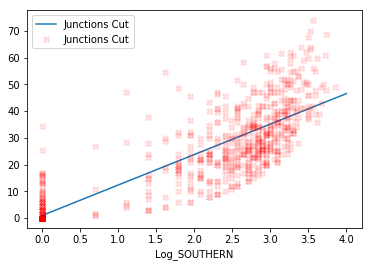

In [46]:
#Now plot the new model
xfit_log = np.linspace(0, 4)
xfit_log_reshaped = xfit_log[:, np.newaxis]
yfit_log = model_log.predict(xfit_log_reshaped)

Predicted_df_log = pd.DataFrame({'Log_SOUTHERN':xfit_log, 'Junctions Cut':yfit_log})
ax = Predicted_df_log.plot('Log_SOUTHERN','Junctions Cut')
Interflow_DS.plot('Log_SOUTHERN','Junctions Cut',marker='X', linewidth = 0, ax=ax, c = 'red', alpha=0.1)

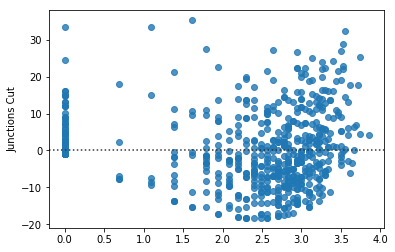

In [45]:
X_SOUTHERN_LOG = Interflow_DS[['Log_SOUTHERN']]
Y_Junctions = Interflow_DS['Junctions Cut']

seaborn.residplot(X_SOUTHERN_LOG,Y_Junctions)